In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

df = pd.read_csv("Taxi_Trip_Data.csv", sep=",")

KeyboardInterrupt: 

In [10]:
df_cleaned = df.dropna()
df_cleaned = df_cleaned[df_cleaned["total_amount"] > 0]
df_cleaned['store_and_fwd_flag'] = df_cleaned['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
dfTest = df_cleaned
dfTest.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6499995,2.0,02/01/2020 12:52:43 PM,02/01/2020 01:02:11 PM,1.0,1.21,1.0,0,238,239,1.0,7.5,0.0,0.5,2.16,0.00,0.3,14.91,2.5
6499996,2.0,02/01/2020 12:38:19 PM,02/01/2020 01:19:03 PM,1.0,17.77,2.0,0,132,100,1.0,52.0,0.0,0.5,12.28,6.12,0.3,73.70,2.5
6499997,2.0,02/01/2020 12:12:39 PM,02/01/2020 12:25:20 PM,1.0,3.57,1.0,0,13,33,1.0,13.5,0.0,0.5,3.36,0.00,0.3,20.16,2.5
6499998,2.0,02/01/2020 12:42:47 PM,02/01/2020 01:09:27 PM,1.0,5.85,1.0,0,209,230,2.0,23.5,0.0,0.5,0.00,0.00,0.3,26.80,2.5
6499999,2.0,02/01/2020 12:02:24 PM,02/01/2020 12:13:36 PM,4.0,1.89,1.0,0,142,236,1.0,9.5,0.0,0.5,2.56,0.00,0.3,15.36,2.5


In [ ]:
dfTest['tpep_pickup_datetime'] = pd.to_datetime(dfTest['tpep_pickup_datetime'])
dfTest['tpep_dropoff_datetime'] = pd.to_datetime(dfTest['tpep_dropoff_datetime'])
dfTest.tail()

C:\Users\Maelg\AppData\Local\Temp\ipykernel_39456\2986252650.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfTest['tpep_pickup_datetime'] = pd.to_datetime(dfTest['tpep_pickup_datetime'])
C:\Users\Maelg\AppData\Local\Temp\ipykernel_39456\2986252650.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfTest['tpep_dropoff_datetime'] = pd.to_datetime(dfTest['tpep_dropoff_datetime'])


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6499995,2.0,2020-02-01 12:52:43,2020-02-01 13:02:11,1.0,1.21,1.0,0,238,239,1.0,7.5,0.0,0.5,2.16,0.00,0.3,14.91,2.5
6499996,2.0,2020-02-01 12:38:19,2020-02-01 13:19:03,1.0,17.77,2.0,0,132,100,1.0,52.0,0.0,0.5,12.28,6.12,0.3,73.70,2.5
6499997,2.0,2020-02-01 12:12:39,2020-02-01 12:25:20,1.0,3.57,1.0,0,13,33,1.0,13.5,0.0,0.5,3.36,0.00,0.3,20.16,2.5
6499998,2.0,2020-02-01 12:42:47,2020-02-01 13:09:27,1.0,5.85,1.0,0,209,230,2.0,23.5,0.0,0.5,0.00,0.00,0.3,26.80,2.5
6499999,2.0,2020-02-01 12:02:24,2020-02-01 12:13:36,4.0,1.89,1.0,0,142,236,1.0,9.5,0.0,0.5,2.56,0.00,0.3,15.36,2.5


In [12]:
print("Dataset shape after cleaning:", dfTest.shape)
dfTest.head()

# Here is the generated matrix into Python

Dataset shape after cleaning: (6399314, 18)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,0,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,0,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,0,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,0,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,0,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


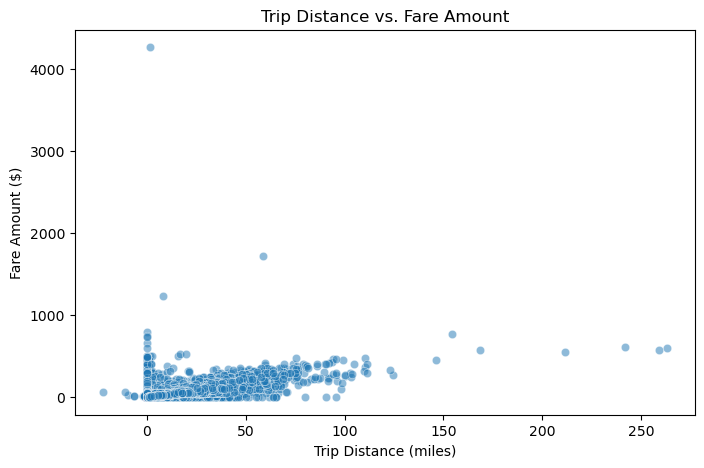

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dfTest['trip_distance'], y=dfTest['fare_amount'], alpha=0.5)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Trip Distance vs. Fare Amount")
plt.show()

# Scatter plot to see the relation between trip_distance and fare_amount
# We can see a linear function undermining prices


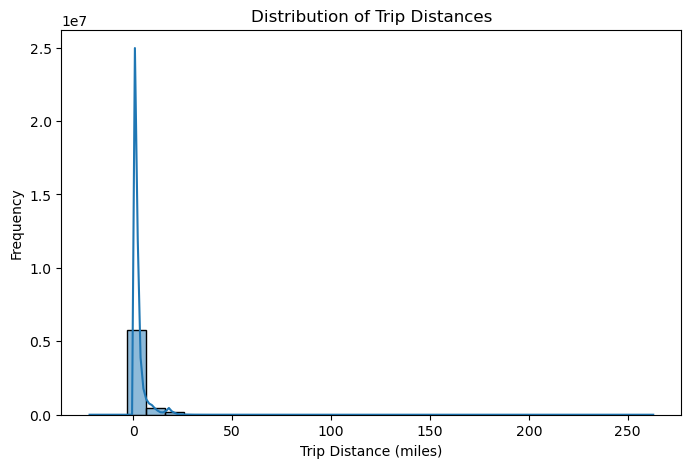

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(dfTest['trip_distance'], bins=30, kde=True)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Distances")
plt.show()



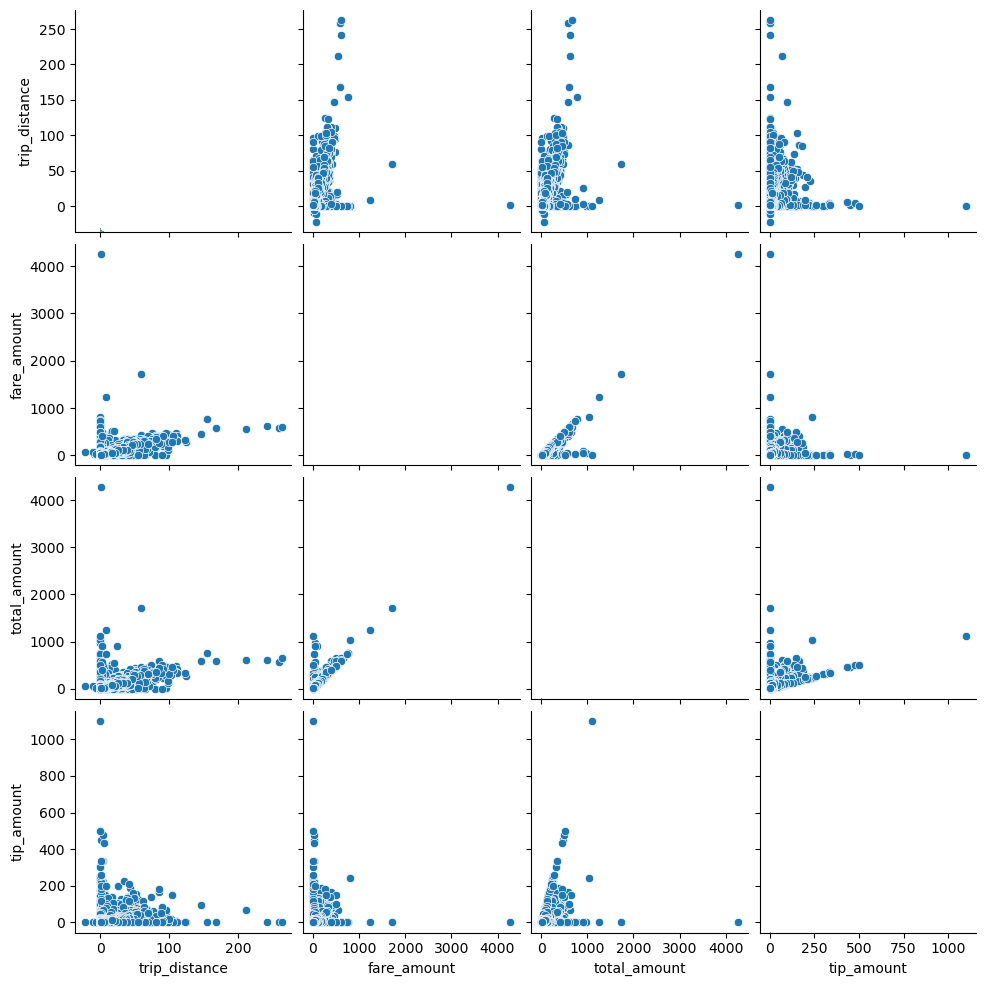

In [15]:
numerical_features = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount']
sns.pairplot(dfTest[numerical_features])
plt.show()

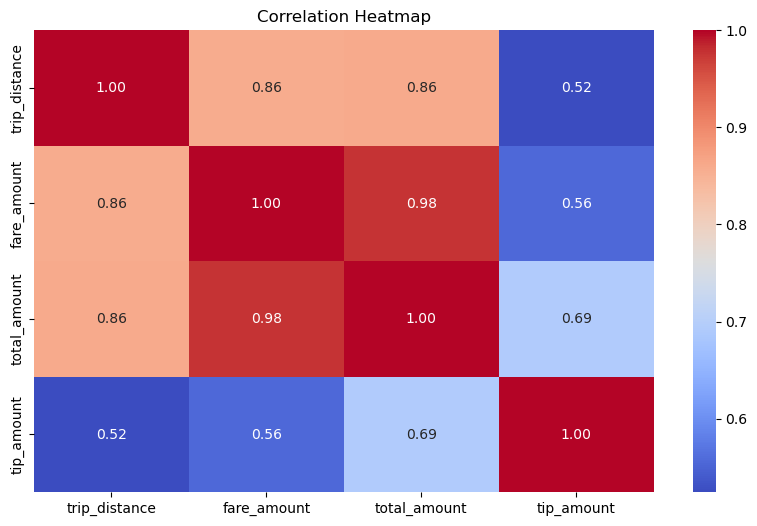

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(dfTest[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()